In [ ]:
Лабораторная работа по модулю “Математика и статистика в Python”
1. Загрузить файл auto.csv
2. Рассчитать основные статистики для переменных(среднее,
медиана, мода, мин/макс, сред. отклонение)
3. Рассчитать и визуализировать корреляционную матрицу для
переменных
4. Визуализировать распределение переменной ‘Price’,
рассчитать показатели skewness и kurtosis
5. Визуализировать несколько взаимосвязей между
переменными
6. Выдвинуть несколько гипотез по набору имеющихся
переменных и проверить эти гипотезы с использованием t-test.
7. Загрузить результат (в формате .ipynb ноутбука) в
репозиторий. Разместить ссылку на репозиторий в лк на сайте.

In [84]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
import statistics

%matplotlib inline

In [6]:
# 1. Загрузить файл auto.csv

data=pd.read_csv('auto.csv')
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,164,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null int64
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null float64
stroke               205 non-null float64
compression-ratio    205 non-null float64
horsepower           205 non-nu

2. Рассчитать основные статистики для переменных(среднее,медиана, мода, мин/макс, сред. отклонение)

In [55]:
data.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,126.365854,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.324878,3.253366,10.142537,106.048780,5131.463415,25.219512,30.751220,13312.712195
std,1.245307,35.438400,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273049,0.313937,3.972040,43.468803,480.933330,6.542142,6.886443,8102.472461
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.130000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,120.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [64]:
data.mode()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.0,161.0,toyota,gas,std,four,sedan,fwd,front,94.5,...,92,mpfi,3.62,3.4,9.0,68.0,5500.0,31.0,25.0,6785.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
data.select_dtypes(include='object').mode()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
0,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi


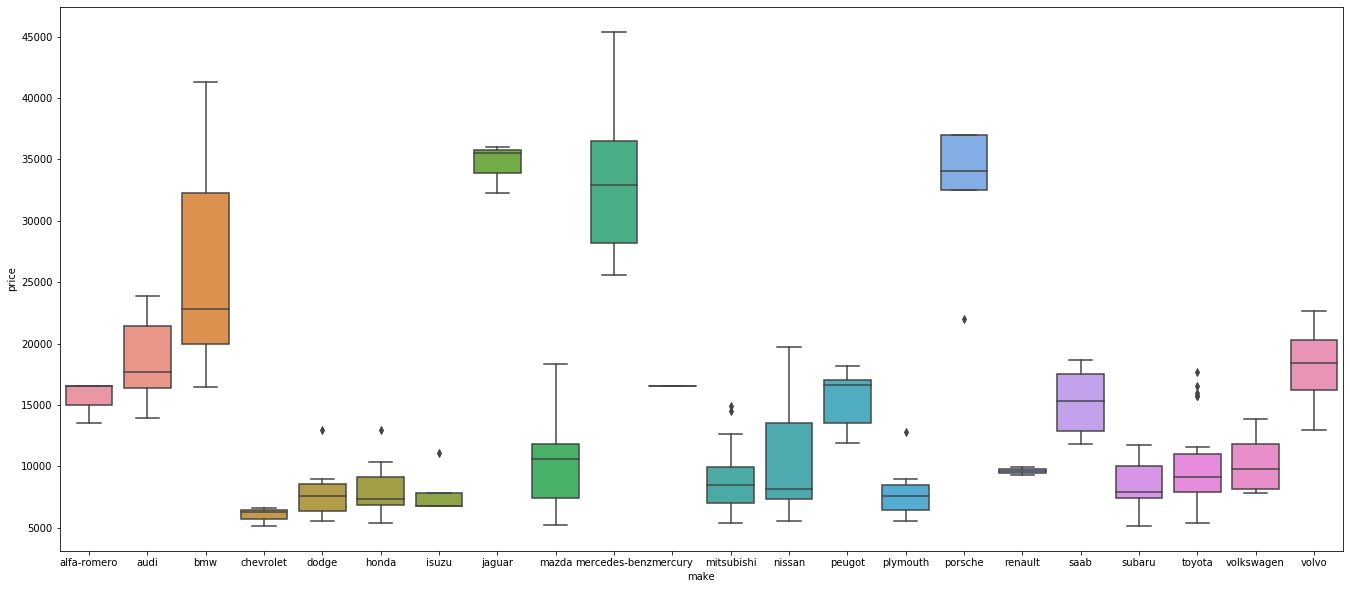

In [57]:
plt.rcParams['figure.figsize']=(23,10)
ax = sns.boxplot(x='make',y='price',data=data)

In [65]:
# 3. Рассчитать и визуализировать корреляционную матрицу для переменных

data.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.497890,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.160225,-0.020132,-0.178515,0.070421,0.273125,-0.035823,0.034606,-0.080149
normalized-losses,0.497890,1.000000,-0.029810,0.051375,0.122172,-0.332532,0.152171,0.166203,0.013503,0.038636,-0.148861,0.274619,0.234561,-0.290161,-0.256047,0.199860
wheel-base,-0.531954,-0.029810,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.495108,0.164549,0.249786,0.301696,-0.363355,-0.470414,-0.544082,0.571784
length,-0.357612,0.051375,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.608905,0.132076,0.158414,0.521192,-0.279406,-0.670909,-0.704662,0.678818
width,-0.232919,0.122172,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.556374,0.183379,0.181129,0.596251,-0.214240,-0.642704,-0.677218,0.764977
height,-0.541038,-0.332532,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.199995,-0.044176,0.261214,-0.114968,-0.322525,-0.048640,-0.107358,0.112421
curb-weight,-0.227691,0.152171,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648219,0.170425,0.151362,0.679865,-0.264976,-0.757414,-0.797465,0.835657
engine-size,-0.105790,0.166203,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.602516,0.211477,0.028971,0.742119,-0.241031,-0.653658,-0.677470,0.870751
bore,-0.160225,0.013503,0.495108,0.608905,0.556374,0.199995,0.648219,0.602516,1.000000,-0.049492,0.008511,0.537543,-0.276942,-0.556570,-0.562065,0.549438
stroke,-0.020132,0.038636,0.164549,0.132076,0.183379,-0.044176,0.170425,0.211477,-0.049492,1.000000,0.187134,0.164722,-0.051970,-0.033609,-0.036502,0.079775


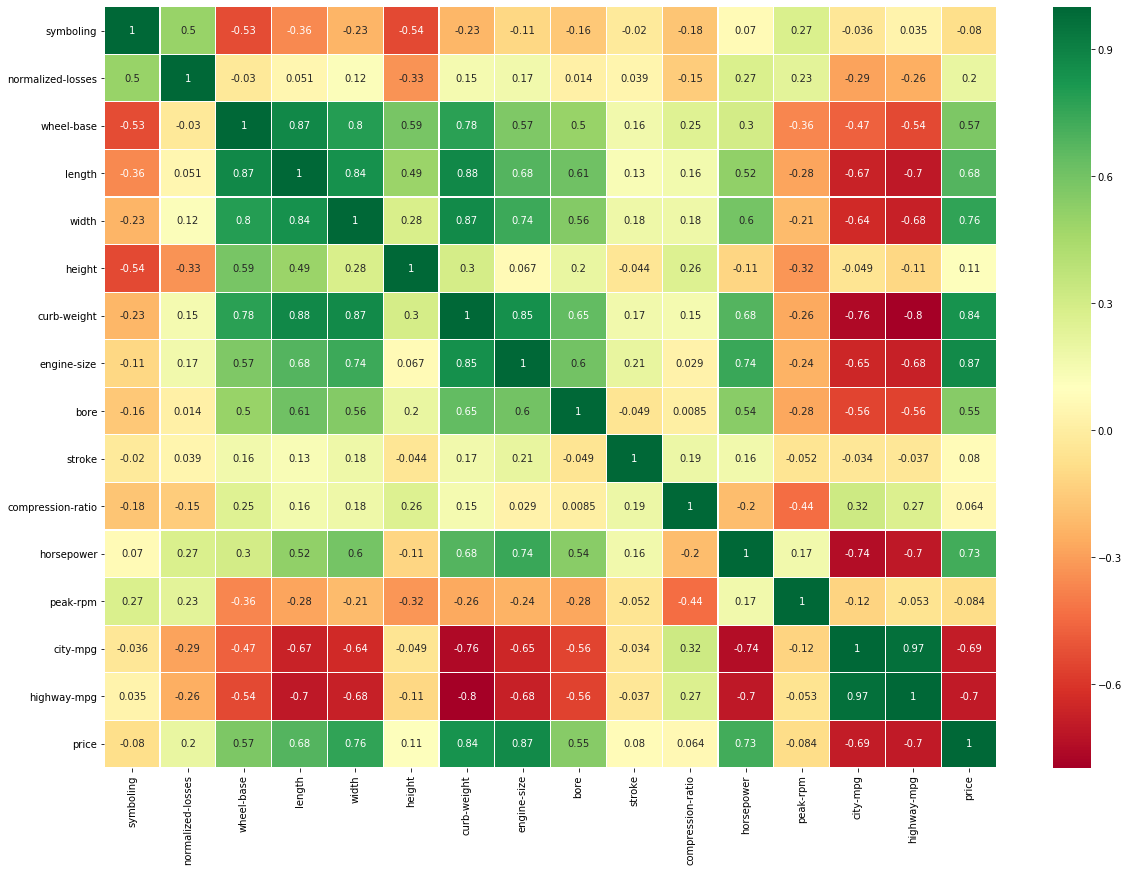

In [60]:
import seaborn as sns

sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(20,14)
plt.show()

In [66]:
import pandas_profiling

ModuleNotFoundError: No module named 'pandas_profiling'

4. Визуализировать распределение переменной ‘Price’,рассчитать показатели skewness и kurtosis

In [67]:
from scipy.stats import skew, kurtosis

In [68]:
skew(data['price']) # сдвиг купола влево относительно  нормального закона распределения

1.7534486514523662

In [69]:
kurtosis(data['price']) # высота купола выше нормального закона распределения

2.848082544390688

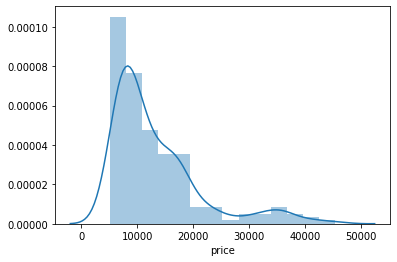

In [70]:
sns.distplot(data['price'])

5. Визуализировать несколько взаимосвязей между переменными

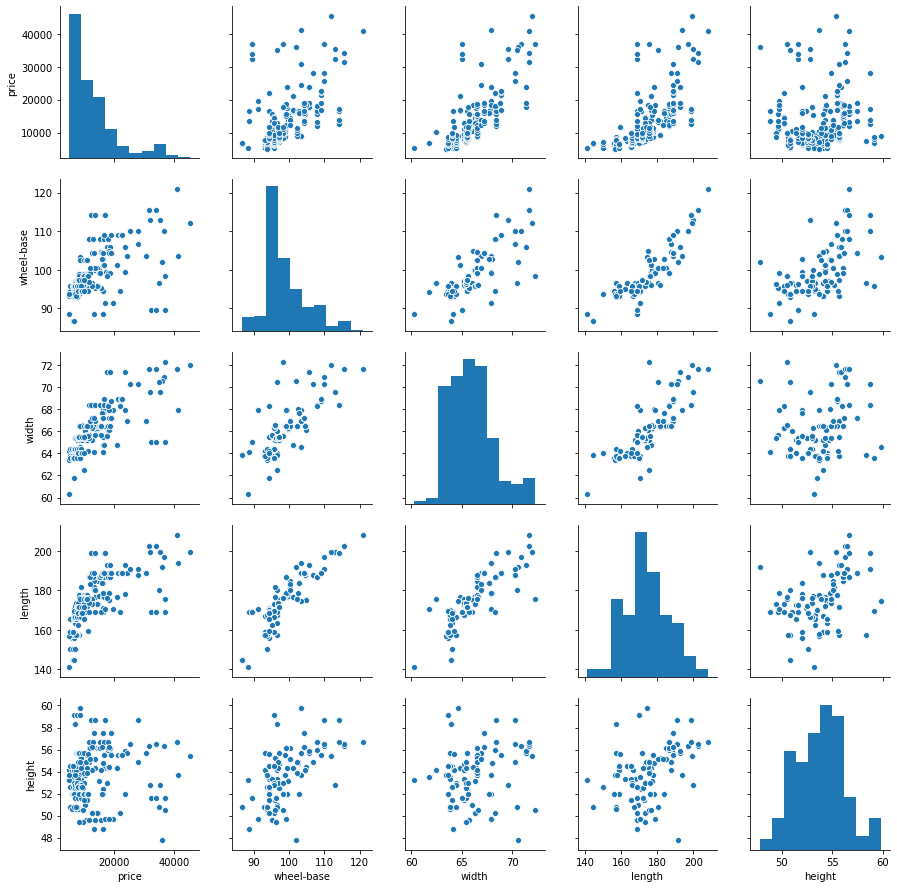

In [73]:
sns.pairplot(data,vars=['price','wheel-base','width','length','height'])

6. Выдвинуть несколько гипотез по набору имеющихся переменных и проверить эти гипотезы с использованием t-test.

ГИПОТЕЗА:
    атмосферные двигатели по трассе расходуют столько же сколько турбированные

In [149]:
atmo_tras = data[data['aspiration']=='std']['highway-mpg']
turbo_tras = data[data['aspiration']=='turbo']['highway-mpg']

In [150]:
len(atmo_tras),len(turbo_tras)

(168, 37)

In [151]:
atmo_tras = atmo_tras.sample(35)
turbo_tras=turbo_tras.sample(35)

In [152]:
# проверим дисперсии для назначения параметра процедуры equal_var
statistics.variance(atmo_tras),statistics.variance(turbo_tras)

(55.02016806722689, 23.30252100840336)

In [153]:
ttest_ind(atmo_tras,turbo_tras,equal_var=False)

Ttest_indResult(statistic=3.418811954659499, pvalue=0.001152260955711357)

Представленная статистика не противоречит ГИПОТЕЗЕ с рvalue < 0,05. 
Следовательно - атмосферные двигатели по трассе расходуют столько же сколько турбированные.

ГИПОТЕЗА:
    атмосферные двигатели по городу расходуют столько же сколько турбированные

In [259]:
# посмотрим как влияет sample на результаты)))
for i in range(10):
    atmo_city = data[data['aspiration']=='std']['city-mpg']
    turbo_city = data[data['aspiration']=='turbo']['city-mpg']
    atmo_city = atmo_city.sample(35)
    turbo_city=turbo_city.sample(35)
    print(statistics.variance(atmo_city),statistics.variance(turbo_city))
    print(ttest_ind(atmo_city,turbo_city,equal_var=False))

43.04705882352941 23.431932773109246
Ttest_indResult(statistic=2.425546629218237, pvalue=0.01818337794728239)
39.852100840336135 23.769747899159665
Ttest_indResult(statistic=2.6701359900306403, pvalue=0.00960309117485506)
47.240336134453784 22.105882352941176
Ttest_indResult(statistic=3.2476900046348915, pvalue=0.001905540429773464)
51.14621848739496 18.574789915966388
Ttest_indResult(statistic=2.8948108075341383, pvalue=0.0054049355677943415)
35.72268907563025 22.584873949579833
Ttest_indResult(statistic=1.7266254393235216, pvalue=0.08900608562402844)
48.48235294117647 22.03361344537815
Ttest_indResult(statistic=1.1876111283166022, pvalue=0.23969714497598543)
37.963025210084034 20.16470588235294
Ttest_indResult(statistic=3.0151796997833773, pvalue=0.0037155599339944085)
48.19327731092437 23.431932773109246
Ttest_indResult(statistic=2.8760439309536276, pvalue=0.00554678219776422)
43.82857142857143 22.961344537815126
Ttest_indResult(statistic=1.944188558106327, pvalue=0.0564170870311410

Представленная статистика в 7 случаях из 10 не противоречит ГИПОТЕЗЕ с рvalue < 0,05. 
ОДНАКО  - видимо из-за произвольного формирования выборки процедурой sample(35) - pvalue может принимать значения большее 0,05 например, pvalue=0.056, или больше. 

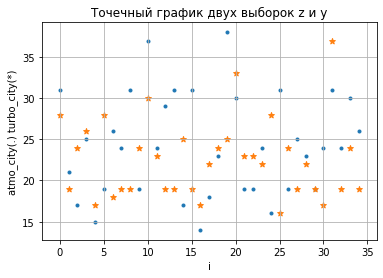

In [286]:
# посмотрел данные - ничего примечательного не увидел - дисперсия меняется 

atmo_city = data[data['aspiration']=='std']['city-mpg']
turbo_city = data[data['aspiration']=='turbo']['city-mpg']
atmo_city = atmo_city.sample(35)
turbo_city=turbo_city.sample(35)
x = [i for i in range(35)]
y = atmo_city
z= turbo_city

plt.xlabel('i')
plt.ylabel('atmo_city(.) turbo_city(*)')
plt.title('Точечный график двух выборок z и y')
plt.grid(True)
plt.scatter(x, y, marker='.')
plt.scatter(x, z, marker='*')
plt.show()